### 퍼셉트론

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
iris = load_iris()

idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, :2]
y = (iris.target[idx]/2).astype(np.int)  #0,1로 만들기 위해

from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

### SGD(Stochastic Gradient Descent)
> 손실함수 자체가 아니라 손실함수의 기댓값을 최소하는 방법이다.
- 그레디언트가 아니라 그레디언트의 기대값의 추정치를 이용

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \text{E}[\nabla L] \\
\end{eqnarray}
$$

- 미니배치라고 부르는 일부의 데이터만 사용하여 그레디언트 추정치 구함
- 퍼셉트론은 오분류된(mis-classified) 데이터만 이용하는 SGD의 일종
- SGD 방법이 기댓값이 최소화되도록 수렴한다는 것은 다양한 논문에서 증명이 되어 있다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


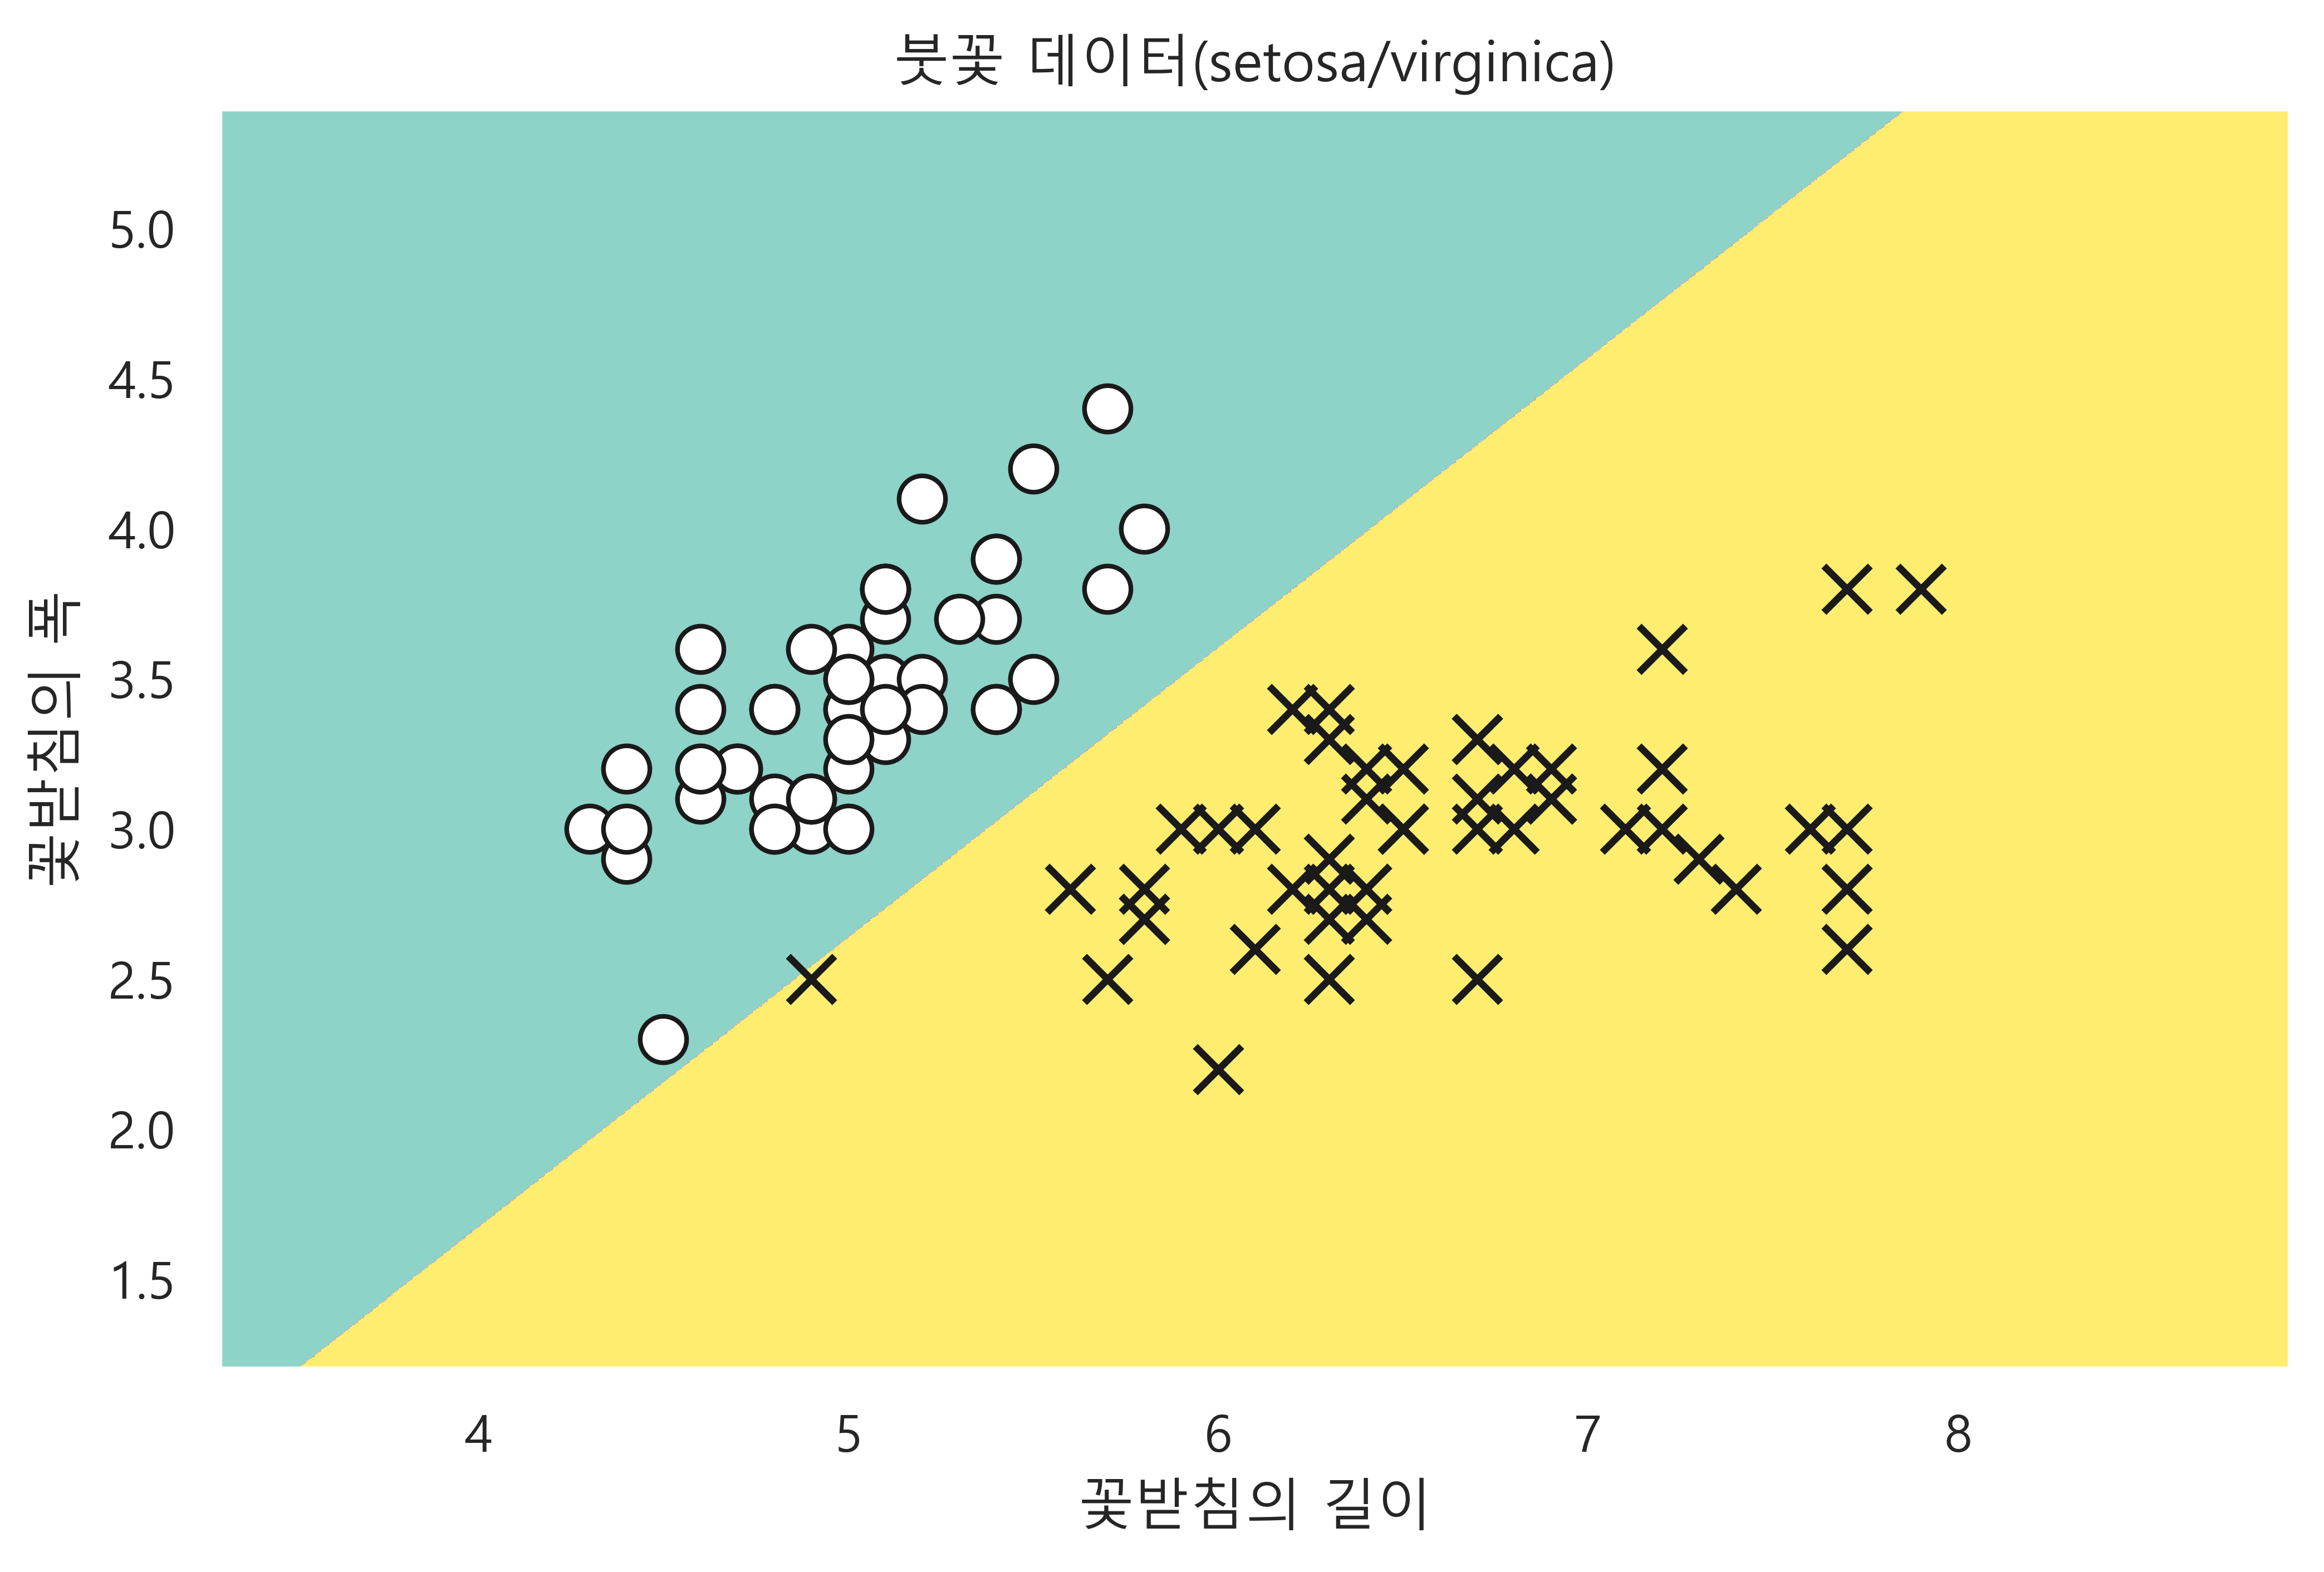

In [4]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(X, y)
    #loss=loss함수 cf)가능: `hinge`, `perceptron`, `log`, `huber`, `modified_huber`, `squared_hinge` 등이다. 보통 `modified_huber`를 사용한다.
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


# from ipywidgets import widgets
# widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

plot_sgd(400)

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
model = SGDClassifier(loss="modified_huber", max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[50,  0],
       [ 0, 50]], dtype=int64)

## 서포트 벡터 머신
- 판별함수 모형
- 안정적인 경계선을 찾기 위한 제한 조건 추가

#### 연습 문제 1

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 `kernel`과 슬랙변수 가중치 인수 `C`는 각각 `linear`, `1e10`으로 한다.

* 특징 변수를 꽃받침의 길이와 폭만 사용한다.
* 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.


In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
from sklearn.datasets import load_iris


iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, 0:2]
y = iris.target[idx]
y = 2 * y - 1

In [41]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

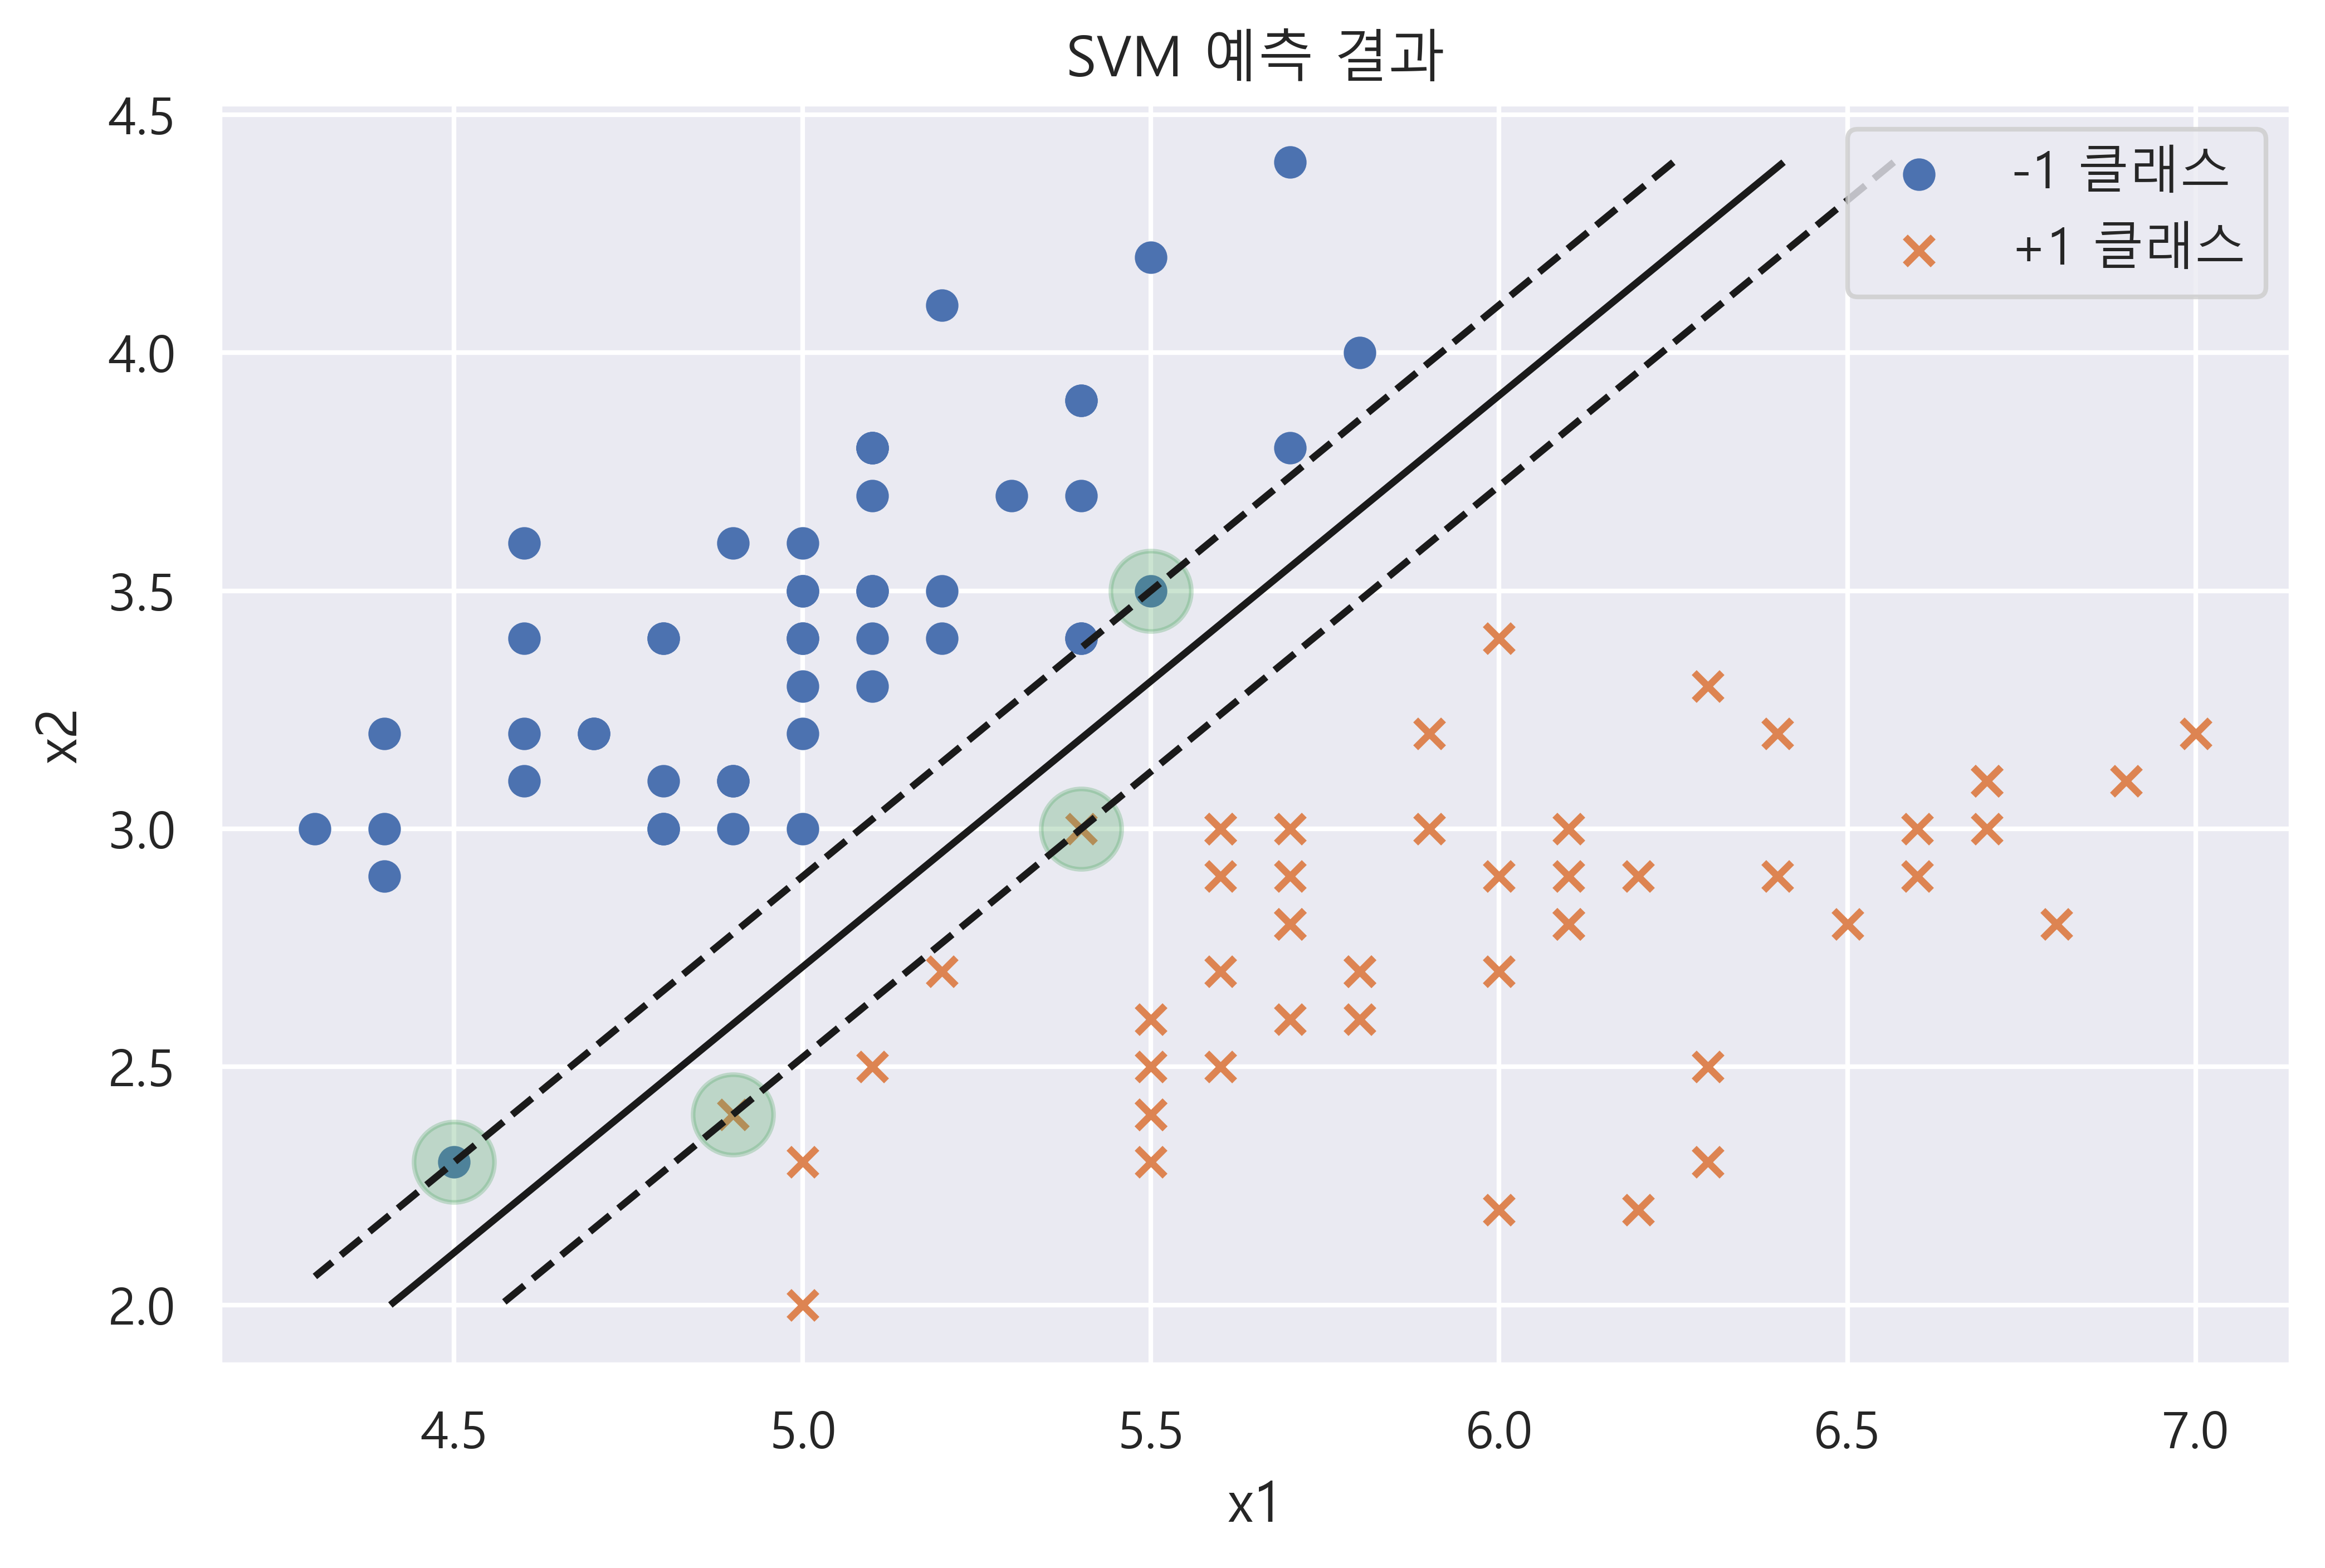

In [43]:
import warnings
warnings.simplefilter("ignore")


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

#### 연습 문제 2

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 `kernel`는 각각 `linear`로 한다. 슬랙변수 가중치 인수 `C`를 여러가지 값으로 바꾸어 보면서 서포트가 어떻게 바뀌는지 살펴본다.

* 특징 변수를 꽃잎의 길이와 폭만 사용한다.
* 붓꽃 종을 Virginica와 Versicolour만 대상으로 한다.

In [126]:
from sklearn.datasets import load_iris


iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, 2:]
y = iris.target[idx]
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [127]:
y= np.where(y==2, -1,y)

In [128]:
from sklearn.svm import SVC
penalty = 10
model = SVC(kernel='linear', C=penalty).fit(X, y)

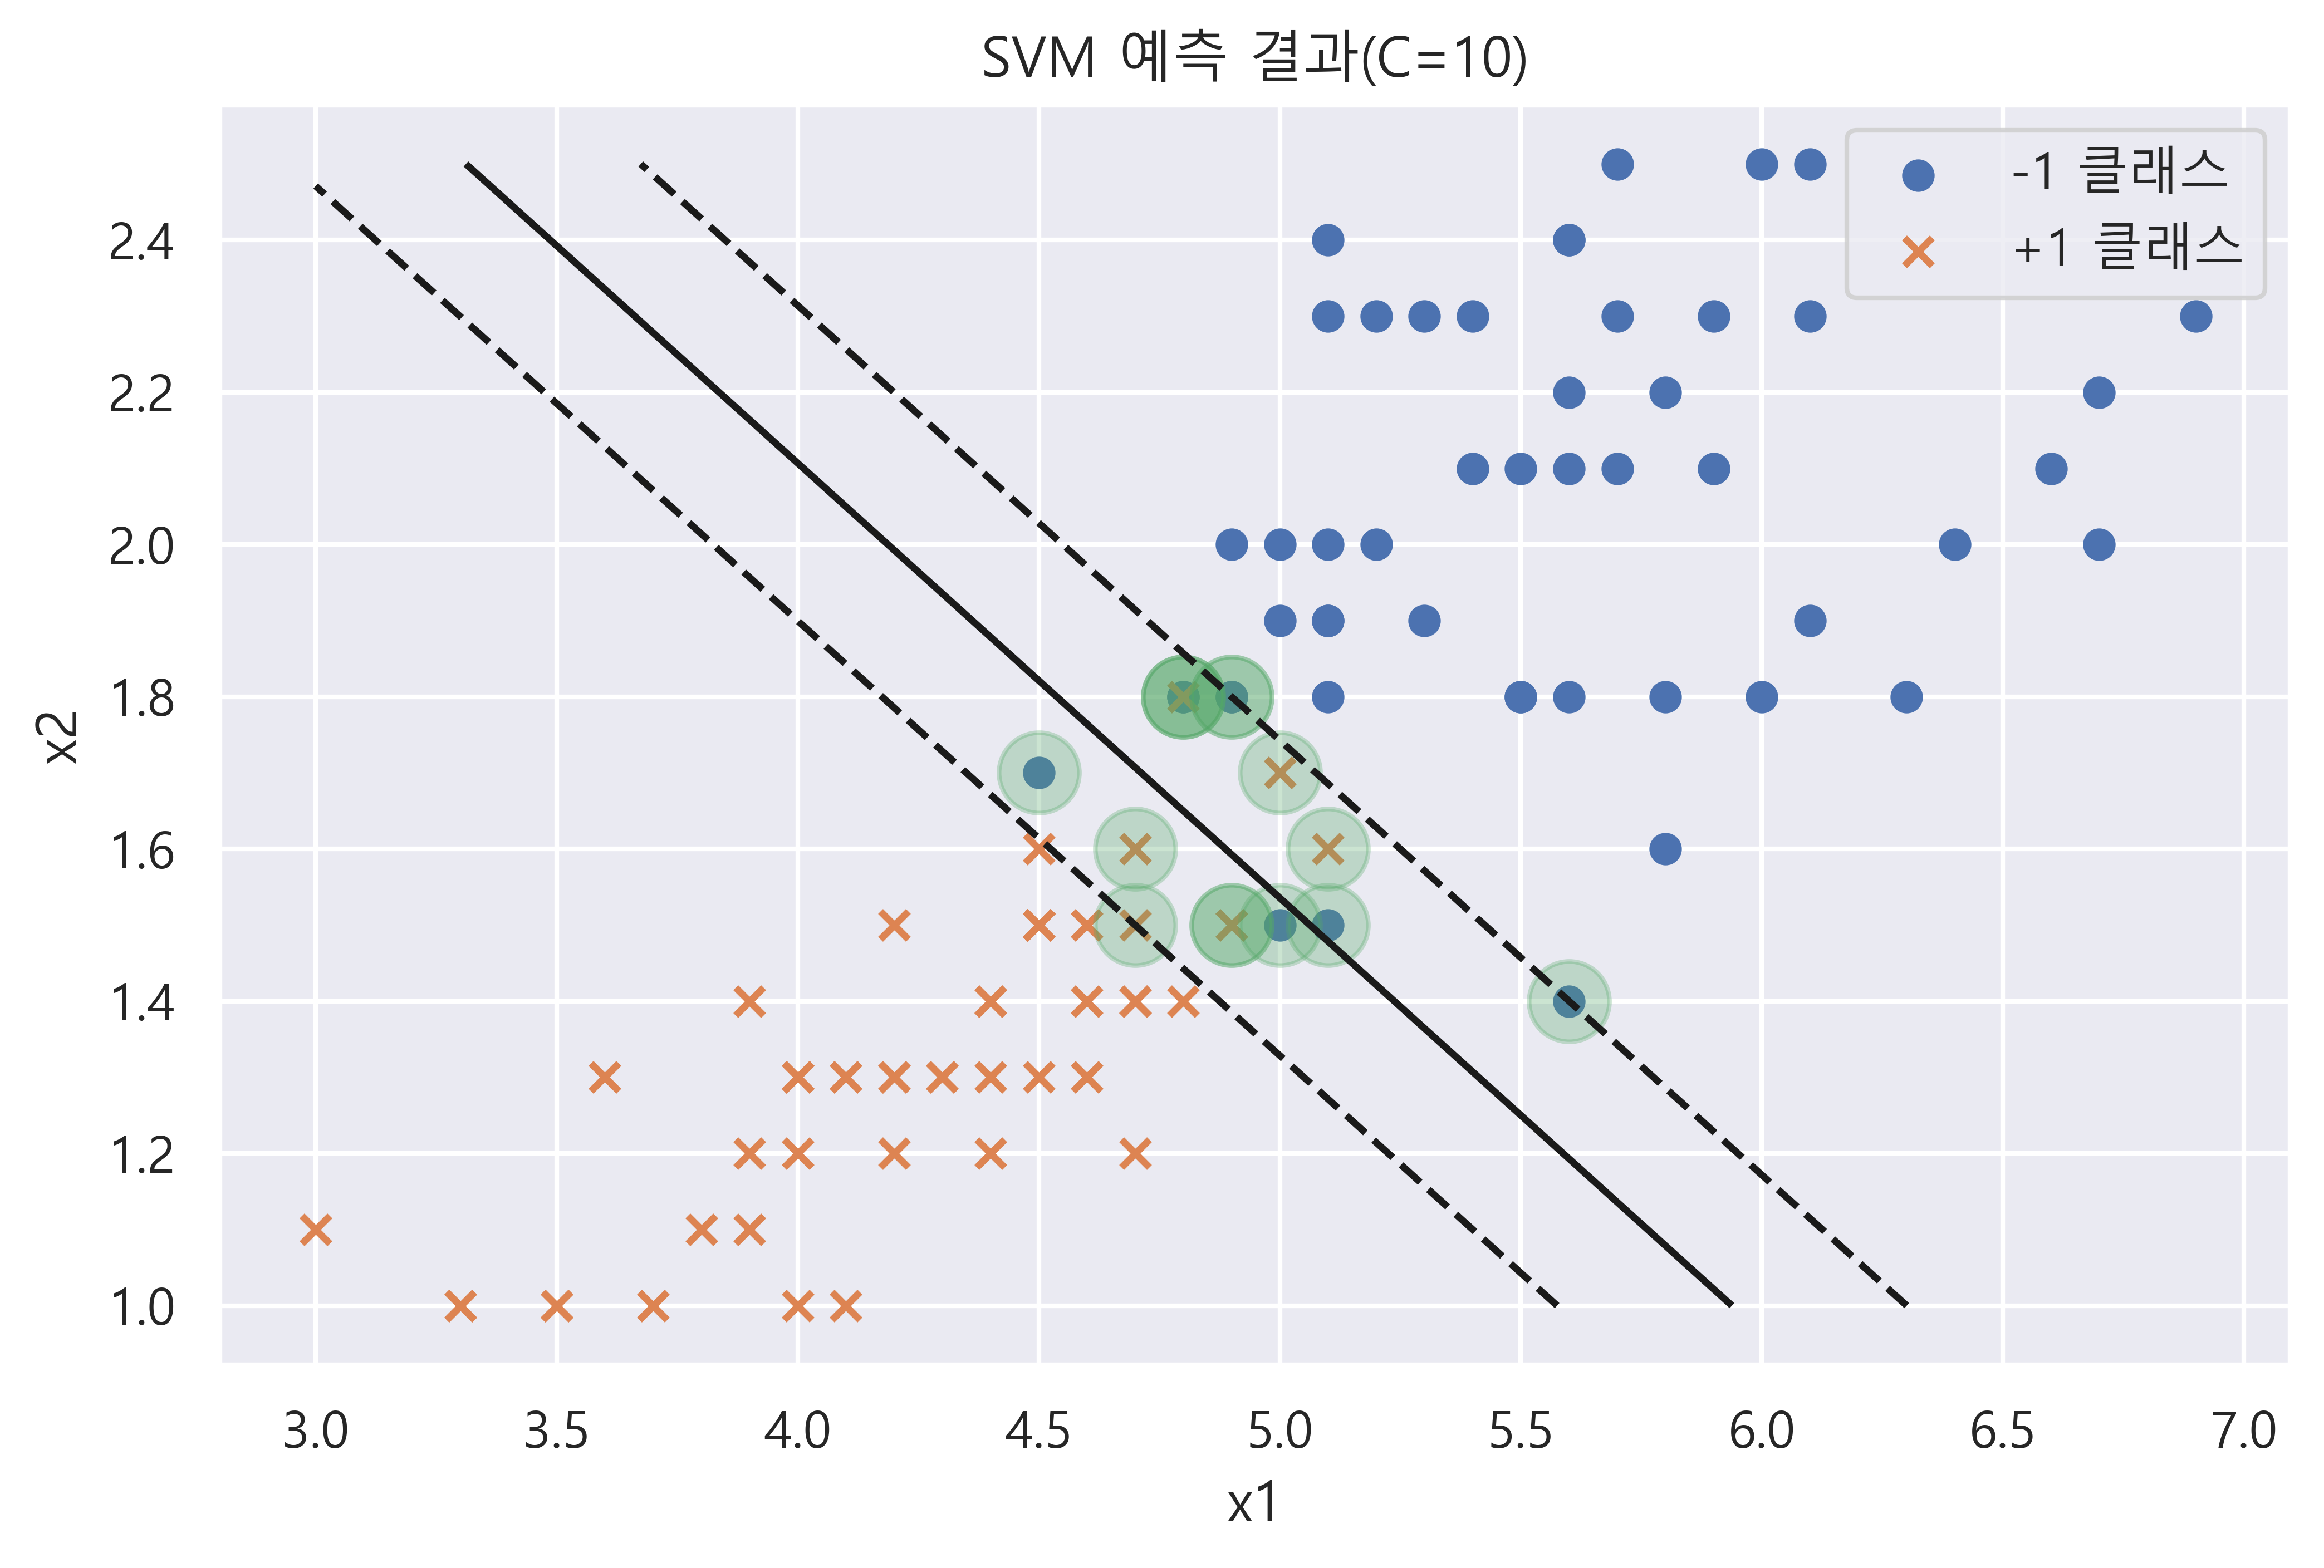

In [129]:
import warnings
warnings.simplefilter("ignore")


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과(C=10)")

plt.show()

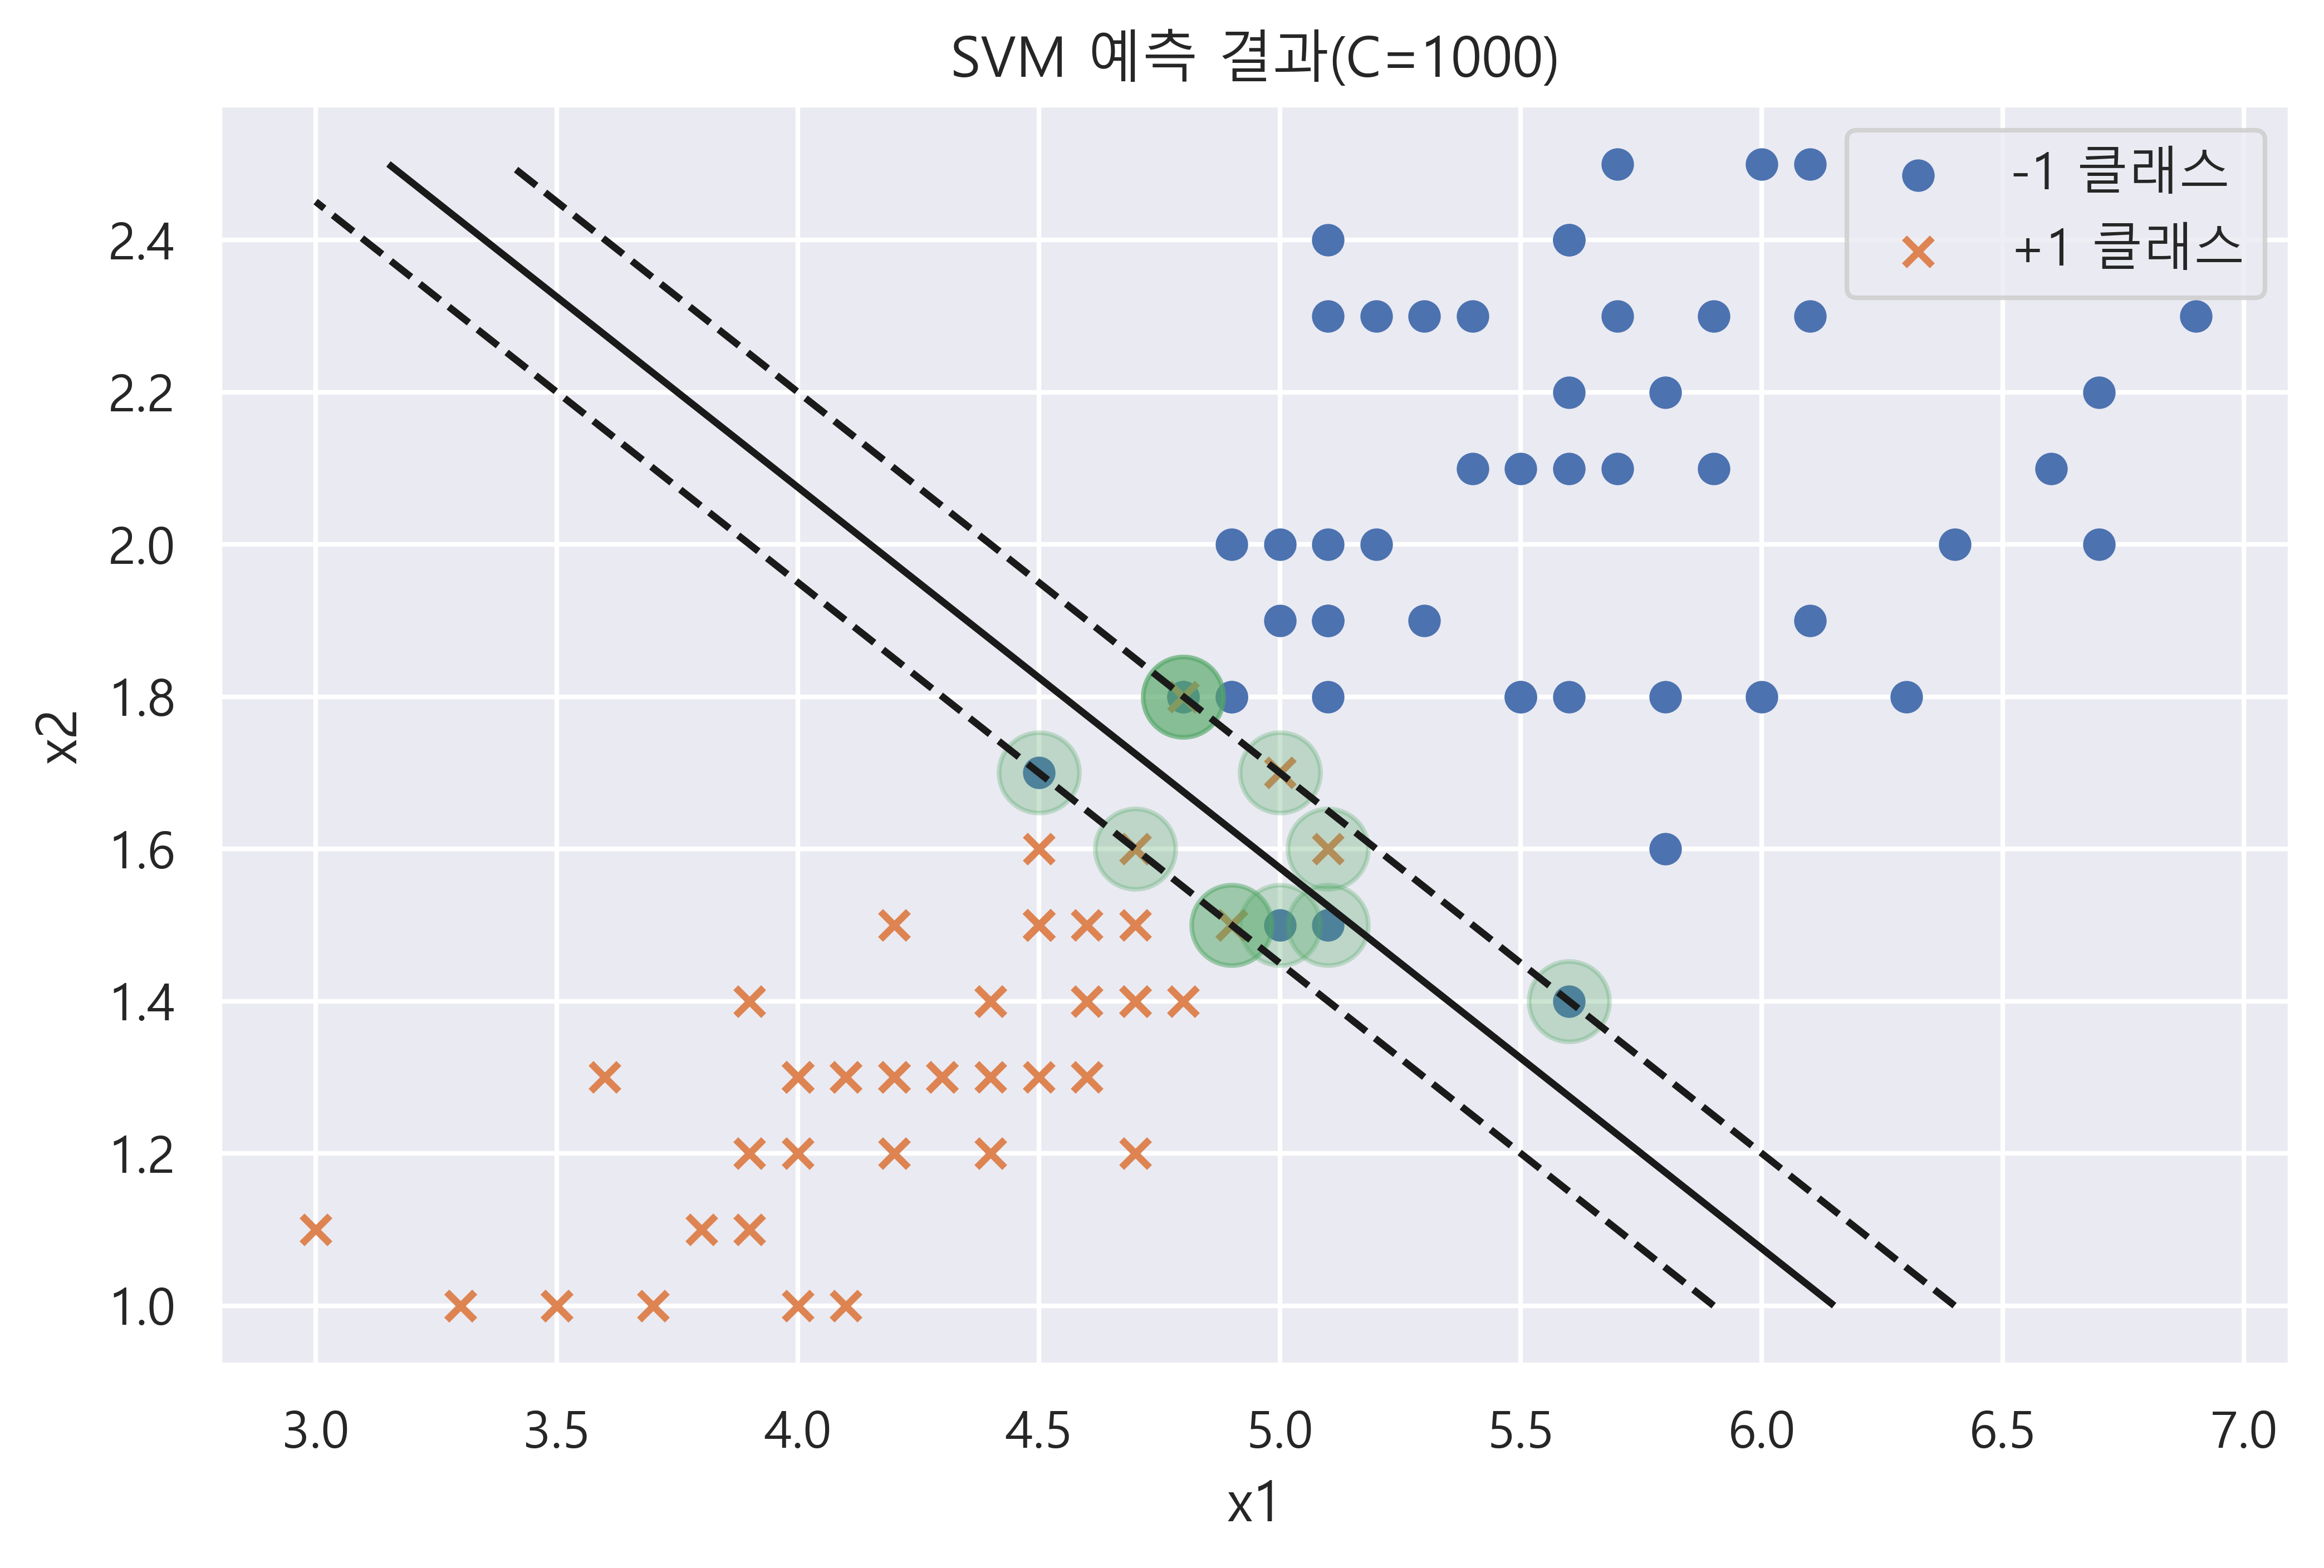

In [130]:
from sklearn.svm import SVC
penalty = 1000
model = SVC(kernel='linear', C=penalty).fit(X, y)
import warnings
warnings.simplefilter("ignore")

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과(C={})".format(penalty))

plt.show()

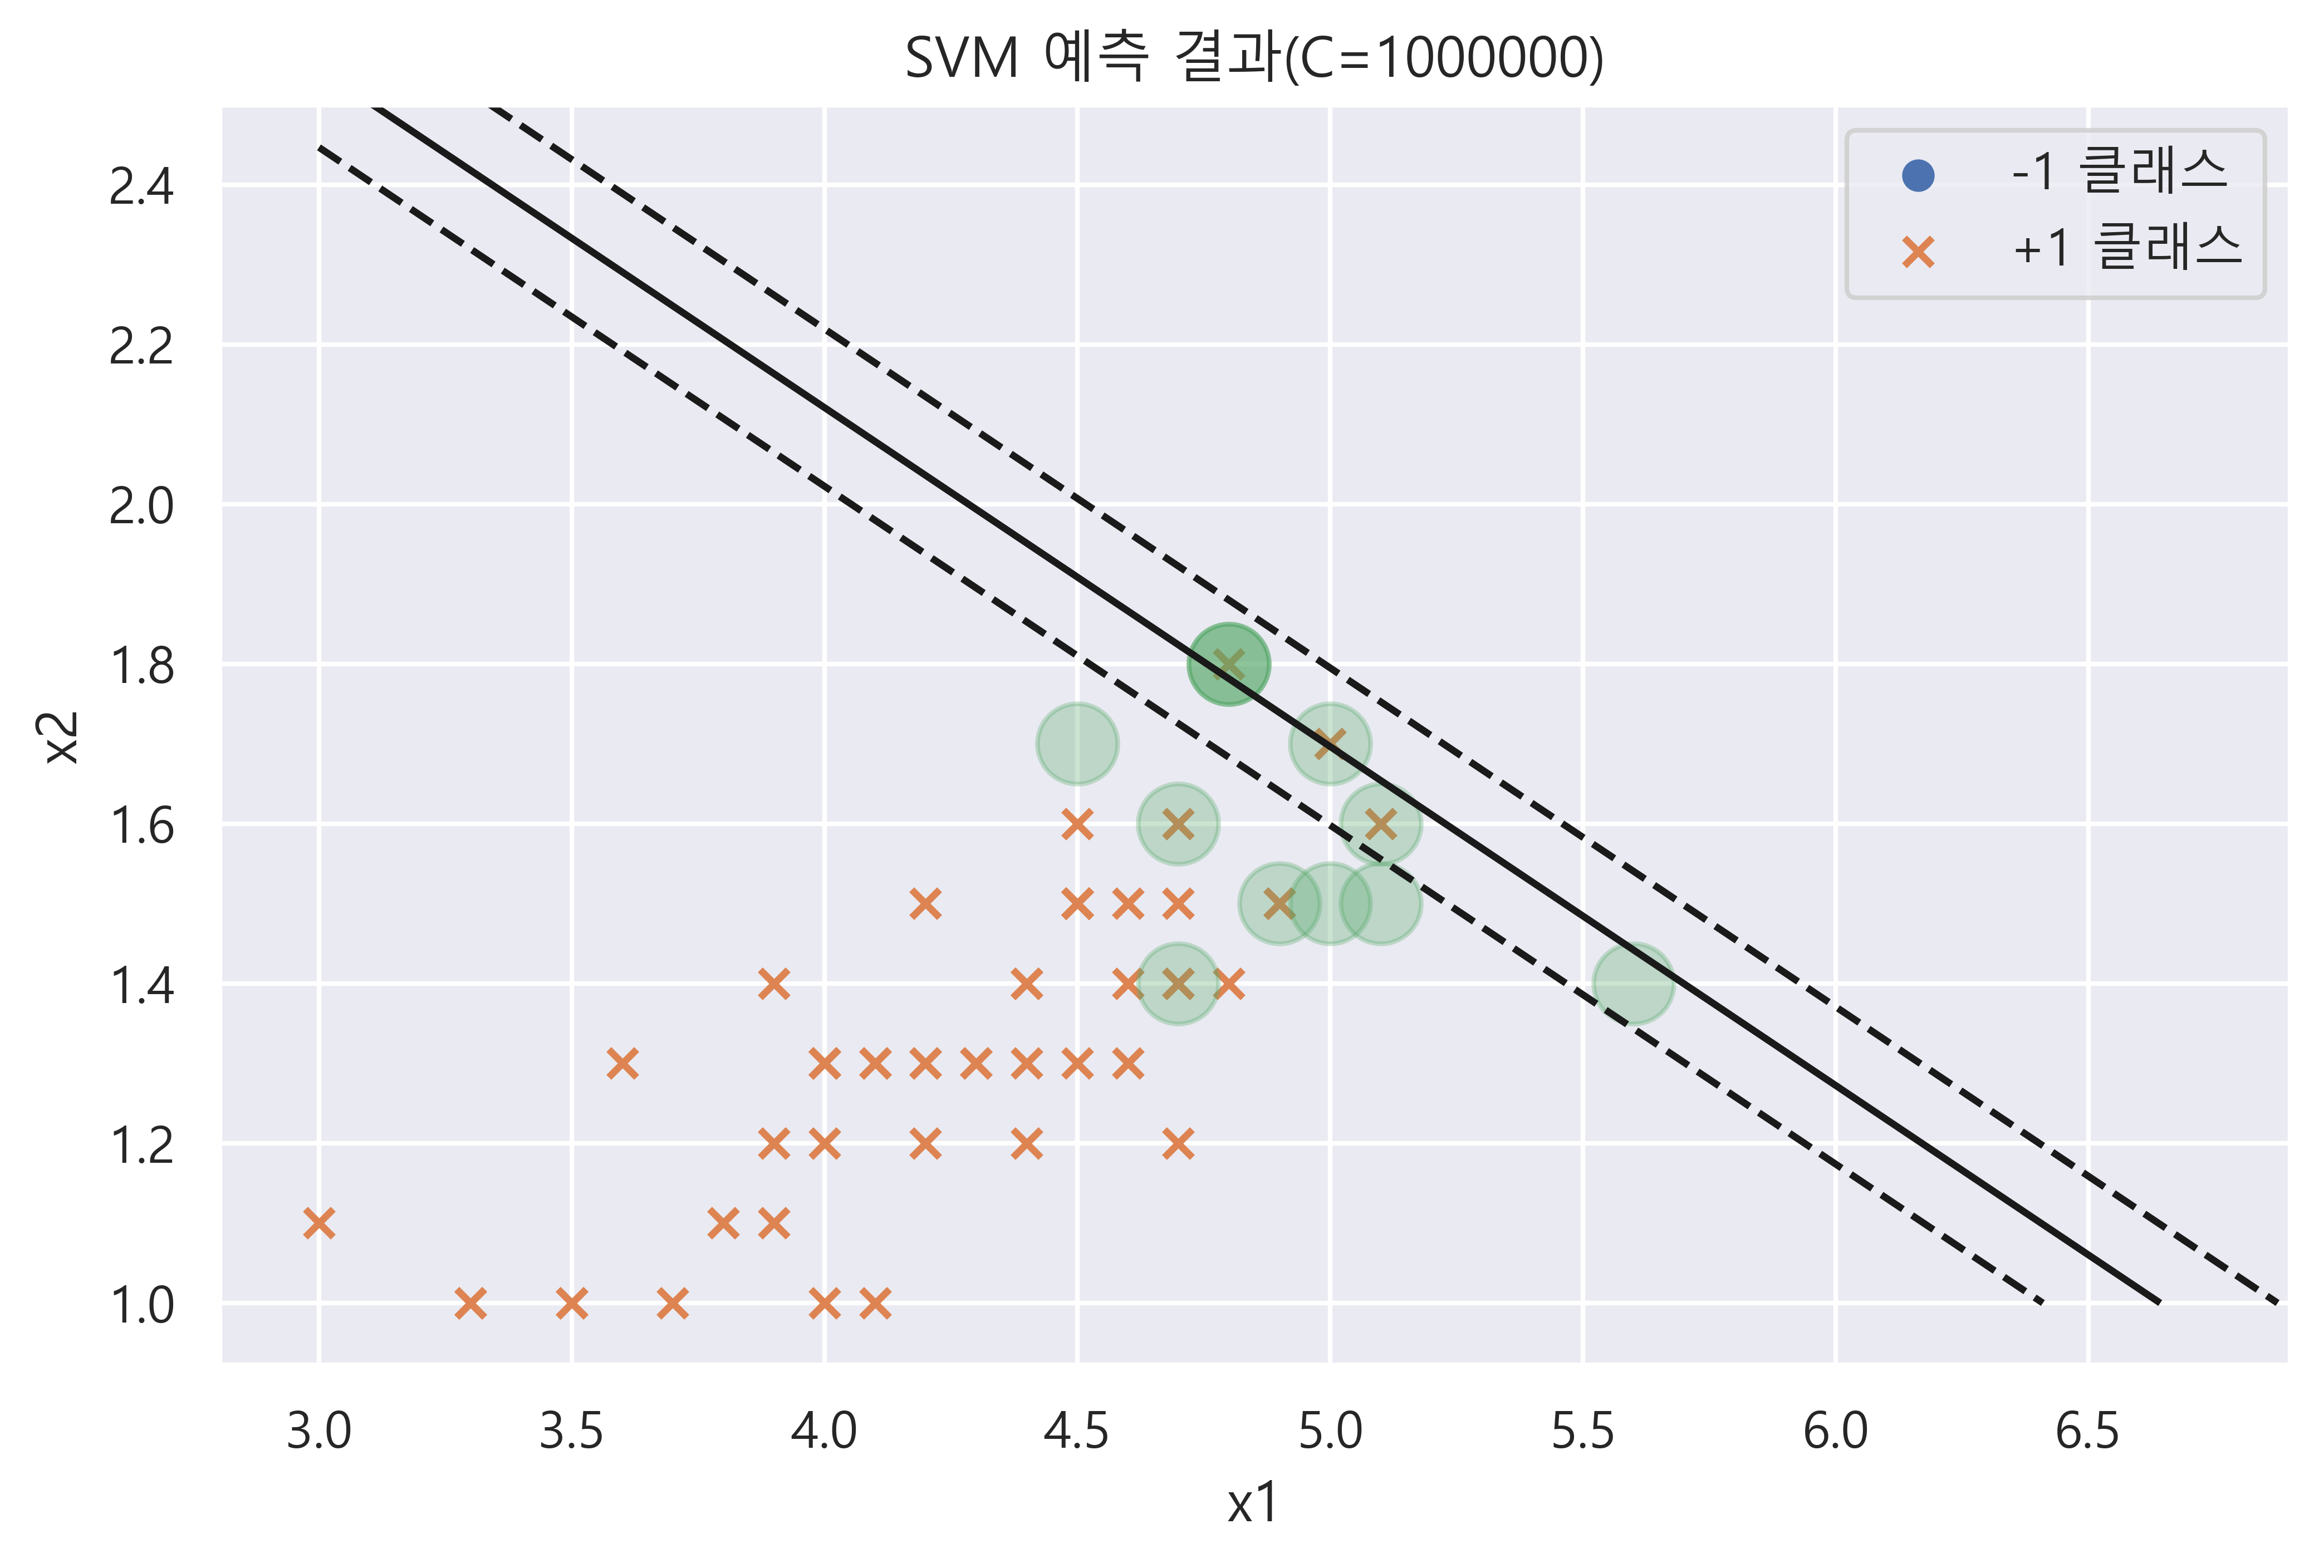

In [73]:
from sklearn.svm import SVC
penalty = 1000000
model = SVC(kernel='linear', C=penalty).fit(X, y)
import warnings
warnings.simplefilter("ignore")

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과(C={})".format(penalty))

plt.show()

In [96]:
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00       118
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00       105
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00       106

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078



In [133]:
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.97      0.96        73
           2       1.00      0.99      0.99        71
           3       0.95      0.99      0.97        70
           4       0.98      1.00      0.99        63
           5       0.97      0.97      0.97        89
           6       0.99      0.99      0.99        76
           7       1.00      0.98      0.99        65
           8       0.96      0.92      0.94        78
           9       0.97      0.96      0.97        74

    accuracy                           0.97       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.97      0.97       719

